In [1]:
import pandas

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

In [2]:
tanggal = ["Month"]

origin = pandas.read_table("/content/airline.csv", sep=",", parse_dates=tanggal)

In [3]:
origin = origin.sort_values("Month")

origin = origin.set_index("Month")

origin.columns = ["monthly"]

origin.iloc[:5]

,monthly
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
origin.tail()

,monthly
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [5]:
origin.isnull().sum().sum()

0

In [6]:
total_data = len(origin)

total_data

144

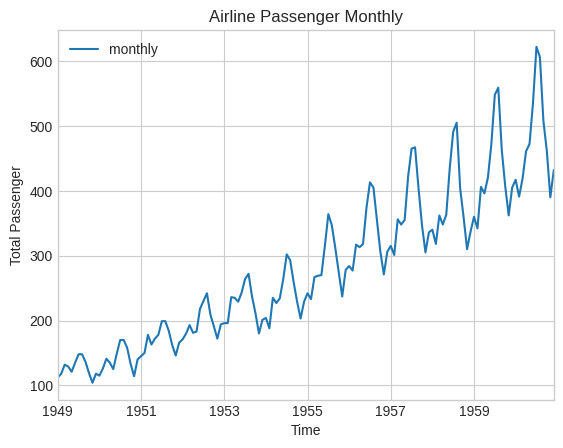

In [7]:
title = "Airline Passenger Monthly"

xlabel = "Time"

ylabel = "Total Passenger"

origin.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

In [8]:
origin.iloc[:3]

,monthly
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


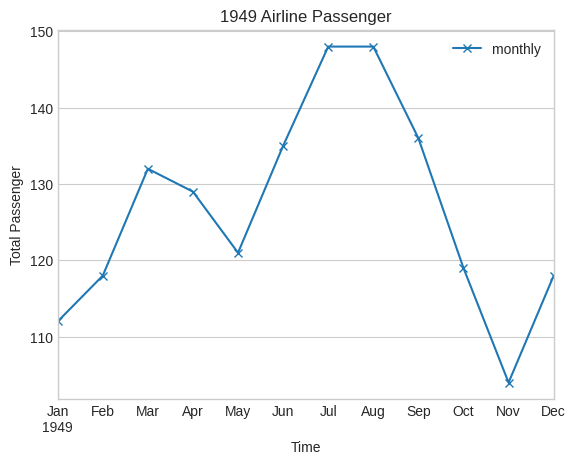

In [9]:
title = "1949 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

origin["1949-01-01":"1949-12-01"].plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x");

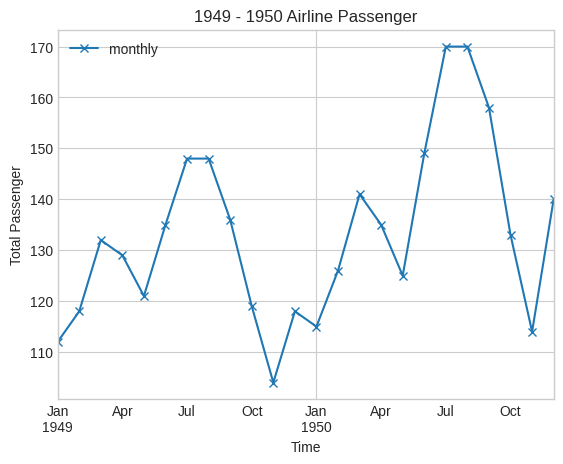

In [10]:
title = "1949 - 1950 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

origin["1949-01-01":"1950-12-01"].plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x");

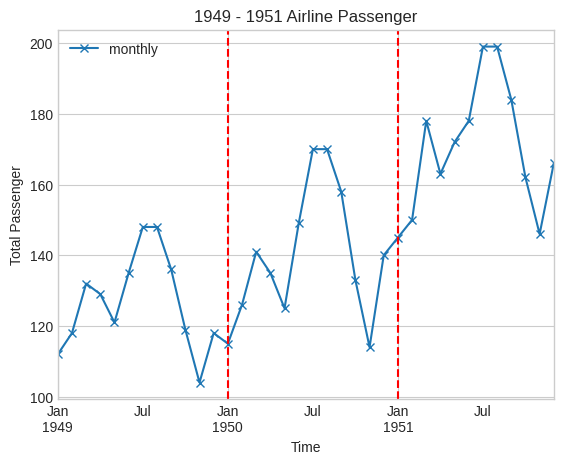

In [11]:
title = "1949 - 1951 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

ax = origin["1949-01-01":"1951-12-01"].plot.line(title=title, marker="x")

ax.set_ylabel(ylabel)

ax.set_xlabel(xlabel)

for line in ["1950-01-01", "1951-01-01"]:

  ax.axvline(line, color="r", linestyle="--");

In [12]:
total = origin.groupby(origin.index.year)["monthly"].sum()

total.iloc[:5]

,monthly
Month,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700


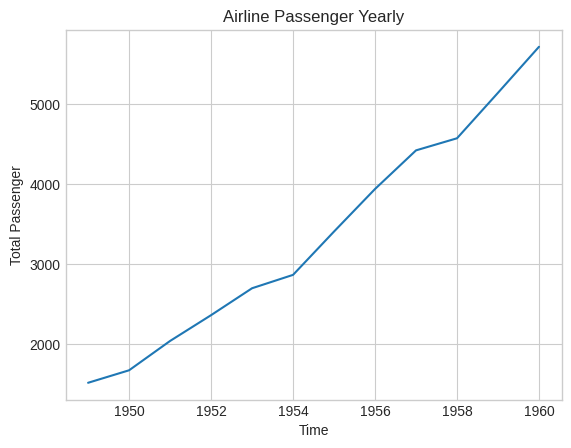

In [13]:
title = "Airline Passenger Yearly"

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

In [14]:
from statsmodels.tsa.stattools import adfuller

tester = adfuller(origin)

result_p = tester[1]

result_p

0.991880243437641

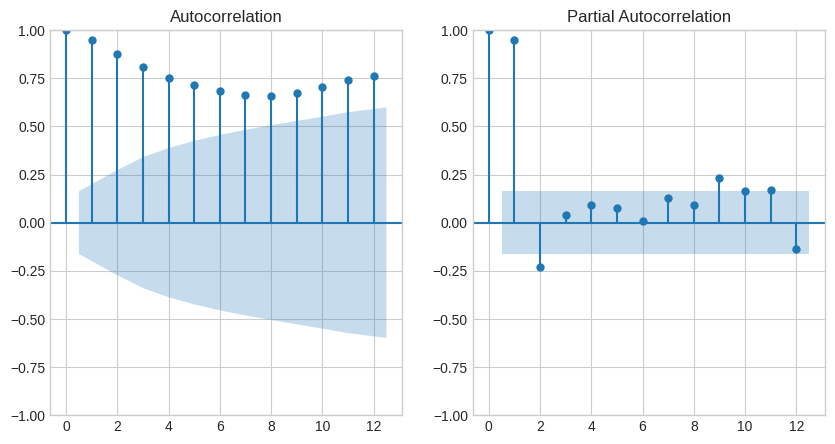

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cate, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(origin["monthly"], lags=12, ax=axes[0])

plot_pacf(origin["monthly"], lags=12, ax=axes[1]);

In [16]:
origin["diff_satu"] = origin["monthly"].diff(1)

origin.iloc[:5]

,monthly,diff_satu
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [17]:
from statsmodels.tsa.stattools import adfuller

sample = origin["diff_satu"].dropna()

tester = adfuller(sample)

result_p = tester[1]

result_p

0.05421329028382478

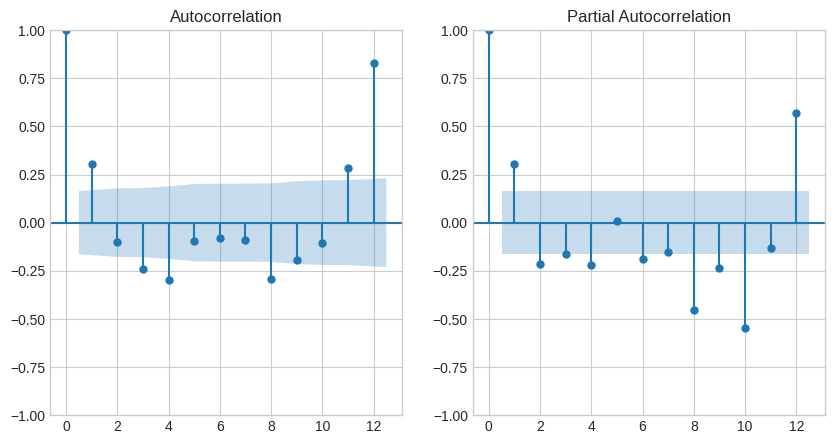

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cate, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(sample, lags=12, ax=axes[0])

plot_pacf(sample, lags=12, ax=axes[1]);

In [19]:
origin["diff_dua"] = origin["monthly"].diff(2)

origin.iloc[:5]

,monthly,diff_satu,diff_dua
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,20.0
1949-04-01,129,-3.0,11.0
1949-05-01,121,-8.0,-11.0


In [20]:
from statsmodels.tsa.stattools import adfuller

sample = origin["diff_dua"].dropna()

tester = adfuller(sample)

result_p = tester[1]

result_p

0.03862975767698902

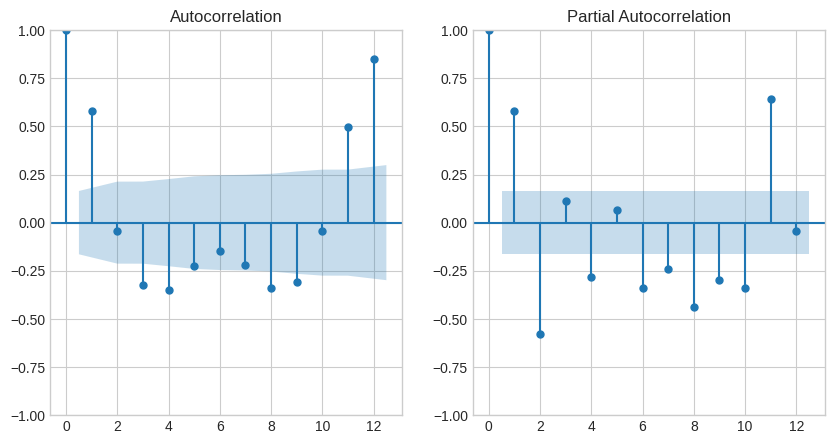

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cate, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(sample, lags=12, ax=axes[0])

plot_pacf(sample, lags=12, ax=axes[1]);